In [1]:
#importing all necessary libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn import linear_model, metrics, model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (ConfusionMatrixDisplay,accuracy_score,classification_report,confusion_matrix)
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import warnings
from scipy.stats import ttest_rel, f_oneway
from scipy.stats import ttest_rel
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve



In [2]:

df  = pd.read_csv("diabetes_012_health_indicators_BRFSS2021.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          236378 non-null  float64
 1   HighBP                236378 non-null  int64  
 2   HighChol              236378 non-null  float64
 3   CholCheck             236378 non-null  int64  
 4   BMI                   236378 non-null  float64
 5   Smoker                236378 non-null  float64
 6   Stroke                236378 non-null  float64
 7   HeartDiseaseorAttack  236378 non-null  float64
 8   PhysActivity          236378 non-null  int64  
 9   Fruits                236378 non-null  int64  
 10  Veggies               236378 non-null  int64  
 11  HvyAlcoholConsump     236378 non-null  int64  
 12  AnyHealthcare         236378 non-null  int64  
 13  NoDocbcCost           236378 non-null  float64
 14  GenHlth               236378 non-null  float64
 15  

In [3]:

df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,2.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,2.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,2.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0


In [4]:
#feature re-scaling

df["GenHlth"] = 6 - df["GenHlth"]


df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,1.0,10.0,20.0,0.0,0,11,4.0,5.0
1,2.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,4.0,0.0,0.0,0.0,0,11,4.0,3.0
2,2.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,4.0,10.0,0.0,0.0,0,9,4.0,7.0
3,2.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,1.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0


In [5]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [6]:



optimization_results = []

for column in df.columns:
   
    min_val = df[column].min()
    max_val = df[column].max()
    
   
    optimization_results.append({'Column': column, 'Min': min_val, 'Max': max_val})


data_types_optimization = pd.DataFrame(optimization_results)


print(data_types_optimization)


                  Column   Min   Max
0           Diabetes_012   0.0   2.0
1                 HighBP   0.0   1.0
2               HighChol   0.0   1.0
3              CholCheck   0.0   1.0
4                    BMI  12.0  99.0
5                 Smoker   0.0   1.0
6                 Stroke   0.0   1.0
7   HeartDiseaseorAttack   0.0   1.0
8           PhysActivity   0.0   1.0
9                 Fruits   0.0   1.0
10               Veggies   0.0   1.0
11     HvyAlcoholConsump   0.0   1.0
12         AnyHealthcare   0.0   1.0
13           NoDocbcCost   0.0   1.0
14               GenHlth   1.0   5.0
15              MentHlth   0.0  30.0
16              PhysHlth   0.0  30.0
17              DiffWalk   0.0   1.0
18                   Sex   0.0   1.0
19                   Age   1.0  13.0
20             Education   1.0   6.0
21                Income   1.0  11.0


In [7]:
#Fixing Categorical Feature Representation 

df["BMI"] = df["BMI"].astype("float32")
df["GenHlth"] = df["GenHlth"].astype("int8")
df["MentHlth"] = df["MentHlth"].astype("int8")
df["PhysHlth"] = df["PhysHlth"].astype("int8")
df["Age"] = df["Age"].astype("int8")


binary_columns = [
    "HighBP",
    "HighChol",
    "Smoker",
    "Stroke",
    "HeartDiseaseorAttack",
    "PhysActivity",
    "Fruits",
    "Veggies",
    "HvyAlcoholConsump",
    "DiffWalk",
    "Sex",
]
for column in binary_columns:
    df[column] = df[column].astype("bool")
    
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,False,True,1,15.0,True,False,False,False,True,...,1,0.0,1,10,20,False,False,11,4.0,5.0
1,2.0,True,False,1,28.0,False,False,True,False,True,...,1,0.0,4,0,0,False,False,11,4.0,3.0
2,2.0,True,True,1,33.0,False,False,False,True,True,...,1,0.0,4,10,0,False,False,9,4.0,7.0
3,2.0,False,True,1,29.0,False,True,True,True,True,...,1,0.0,1,0,30,True,True,12,3.0,4.0
4,0.0,False,False,1,24.0,True,False,False,False,False,...,1,0.0,3,0,0,True,True,13,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236373,2.0,True,True,1,21.0,False,False,False,True,True,...,1,0.0,2,0,0,False,True,10,2.0,3.0
236374,0.0,True,False,1,25.0,True,False,False,True,True,...,0,1.0,4,20,0,False,False,3,4.0,5.0
236375,0.0,False,True,1,31.0,False,False,False,True,True,...,1,0.0,4,0,0,False,True,7,6.0,10.0
236376,0.0,True,False,1,24.0,False,False,False,True,True,...,1,0.0,4,0,0,False,True,10,4.0,6.0


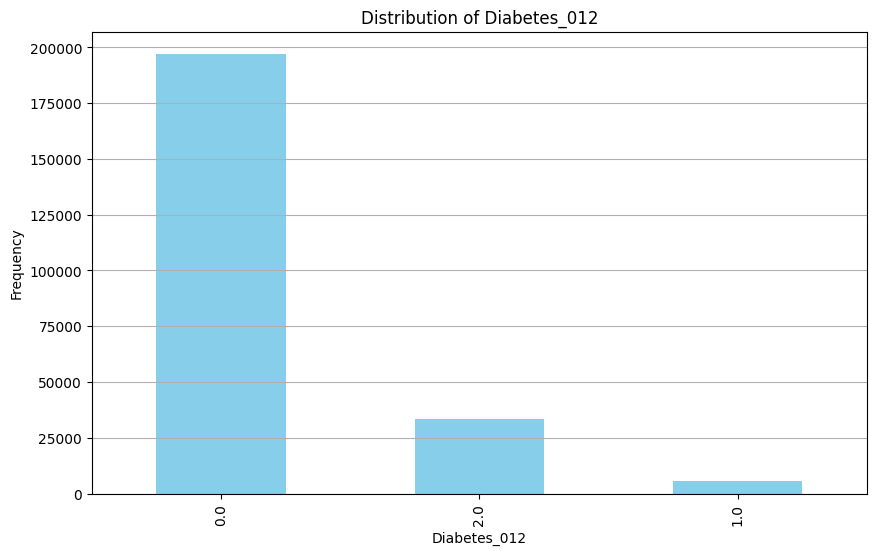

In [8]:

#Class Distribution

column_to_plot = 'Diabetes_012'

plt.figure(figsize=(10, 6))
df[column_to_plot].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of ' + column_to_plot)
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


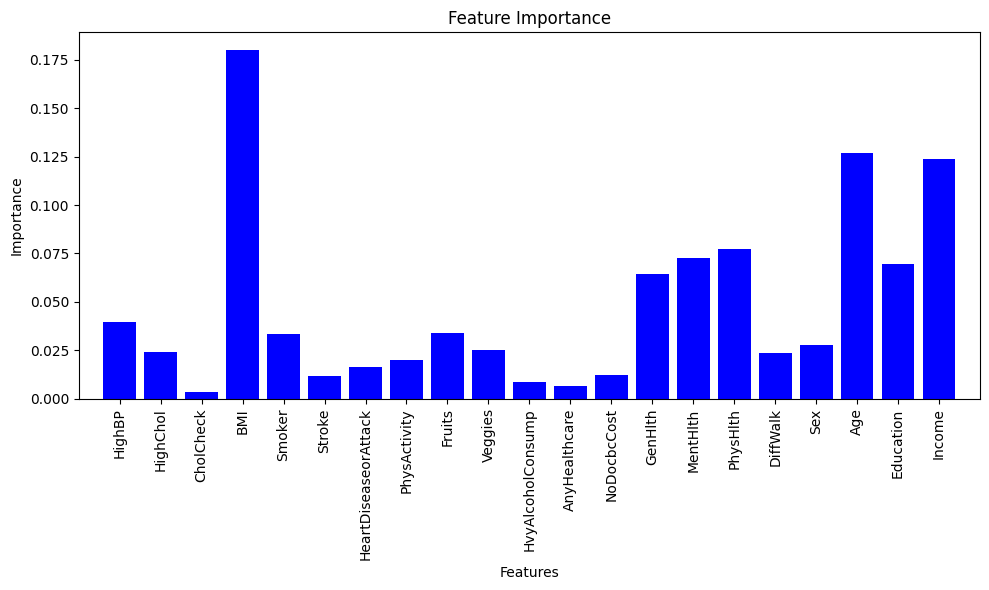

In [9]:
#Feature Importance using Random Forest

warnings.filterwarnings("ignore")


X = df.drop(columns=['Diabetes_012']) 
y = df['Diabetes_012']  
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()


cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='recall')  


rf_classifier.fit(X, y)


importances = rf_classifier.feature_importances_


feature_names = X.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances, color="b", align="center")
plt.xticks(range(X.shape[1]), feature_names, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


In [10]:
#listing and dropping low importance features
low_importance_features = [feature for feature, importance in zip(feature_names, importances) if importance < 0.02]
print("Features with importance less than 0.02:", low_importance_features)

Features with importance less than 0.02: ['CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost']


In [11]:
df = df.drop(columns=['CholCheck',  'Stroke',  'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'HeartDiseaseorAttack'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Diabetes_012  236378 non-null  float64
 1   HighBP        236378 non-null  bool   
 2   HighChol      236378 non-null  bool   
 3   BMI           236378 non-null  float32
 4   Smoker        236378 non-null  bool   
 5   PhysActivity  236378 non-null  bool   
 6   Fruits        236378 non-null  bool   
 7   Veggies       236378 non-null  bool   
 8   GenHlth       236378 non-null  int8   
 9   MentHlth      236378 non-null  int8   
 10  PhysHlth      236378 non-null  int8   
 11  DiffWalk      236378 non-null  bool   
 12  Sex           236378 non-null  bool   
 13  Age           236378 non-null  int8   
 14  Education     236378 non-null  float64
 15  Income        236378 non-null  float64
dtypes: bool(8), float32(1), float64(3), int8(4)
memory usage: 9.0 MB


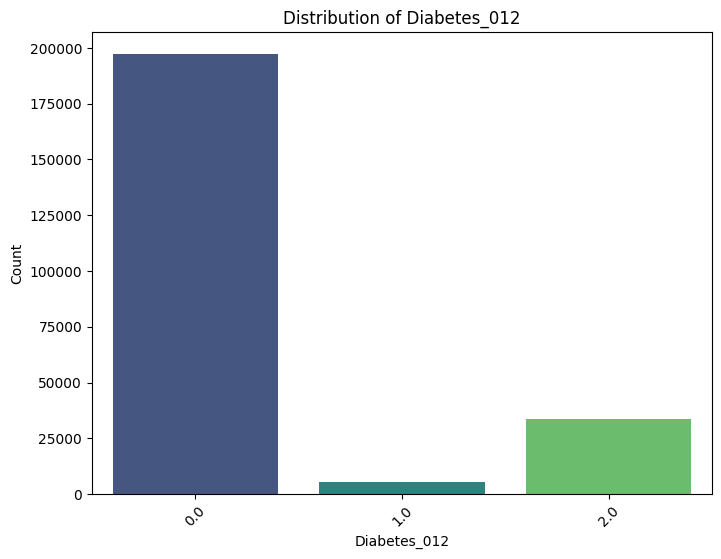

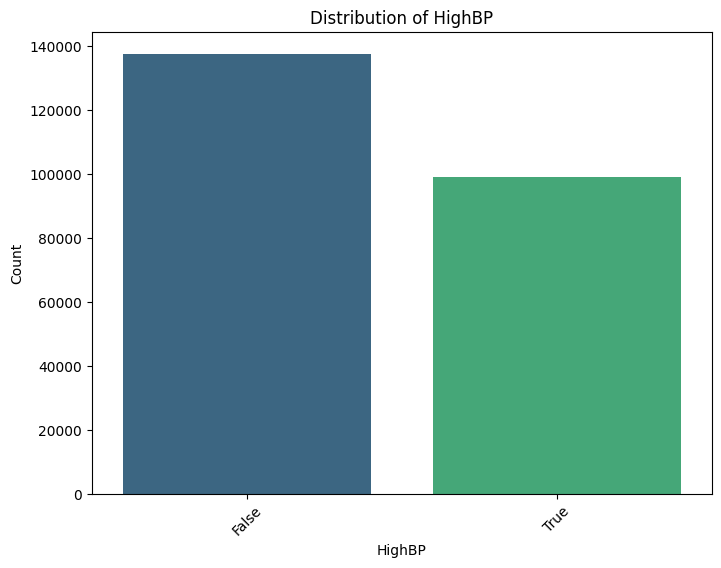

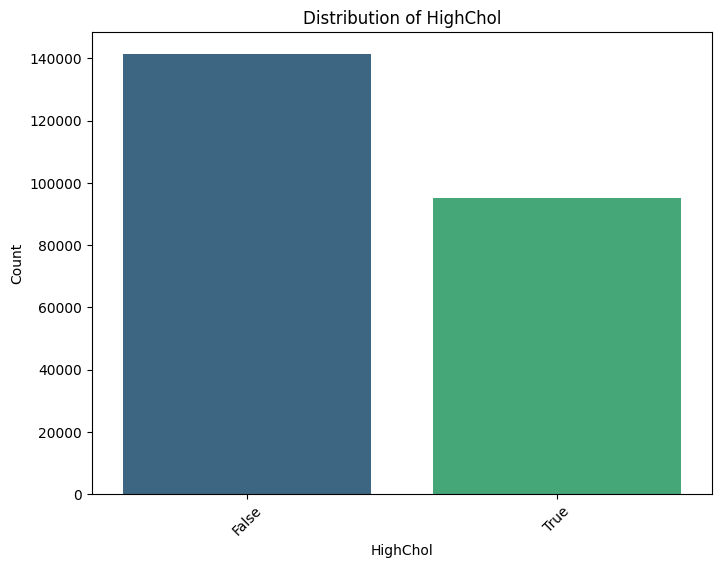

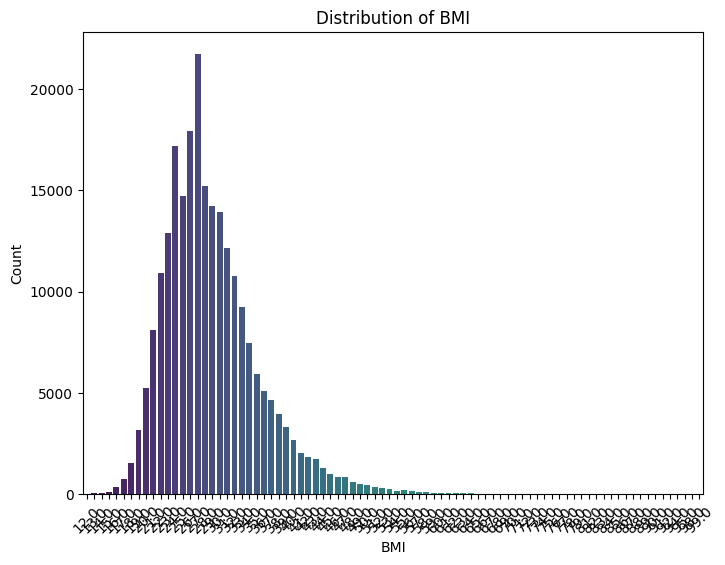

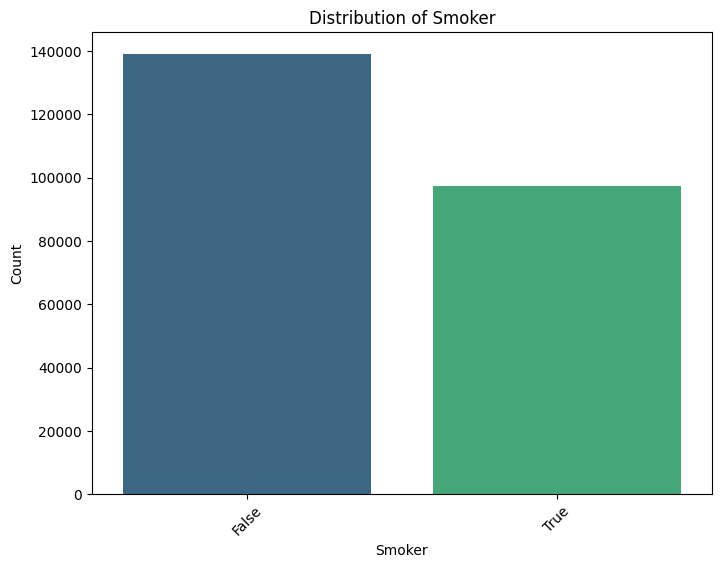

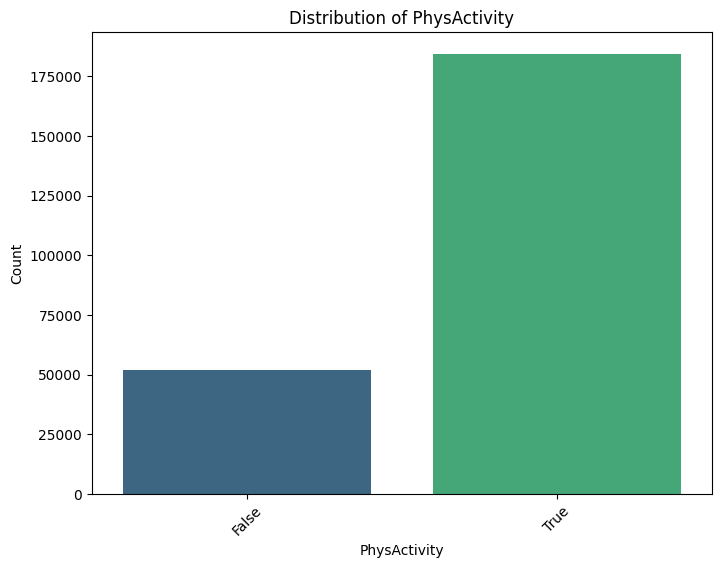

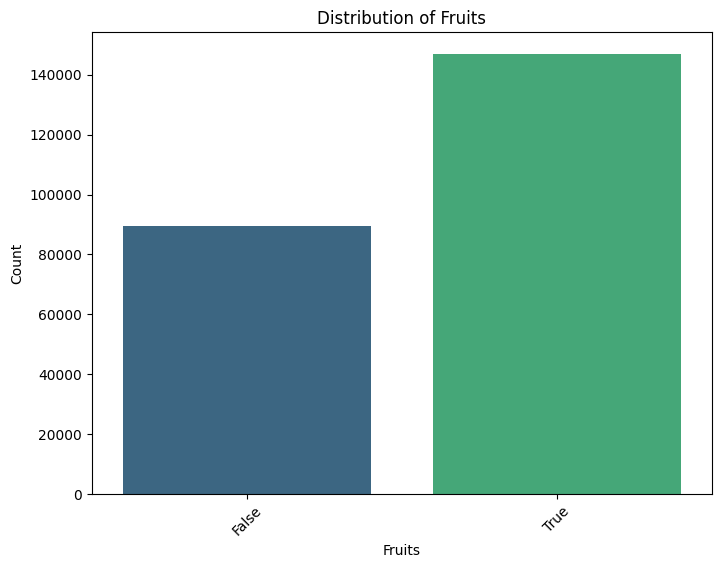

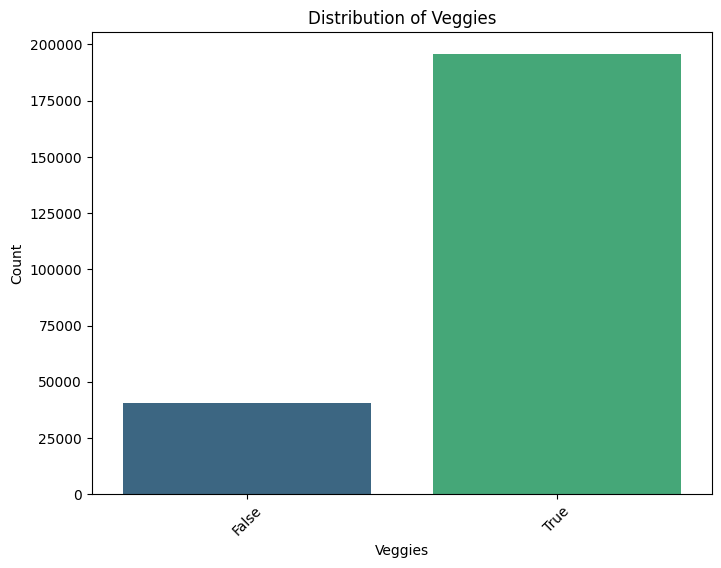

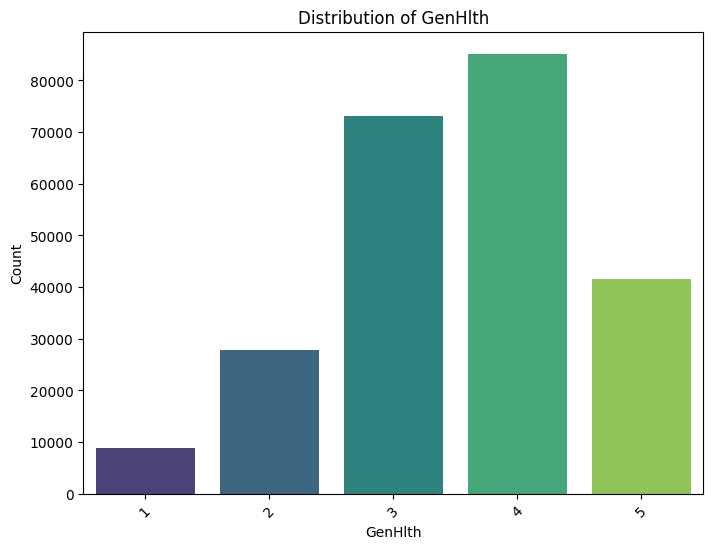

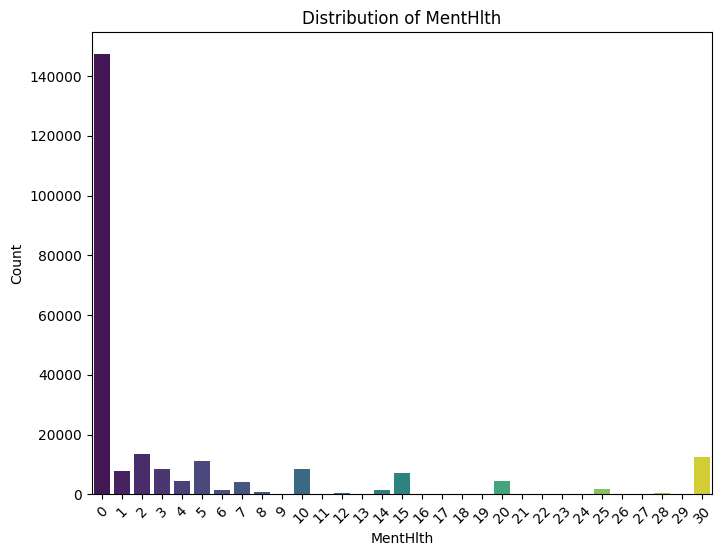

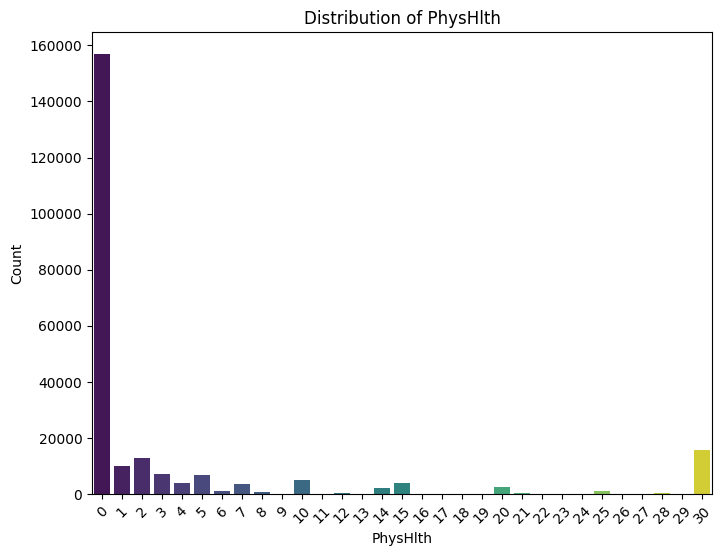

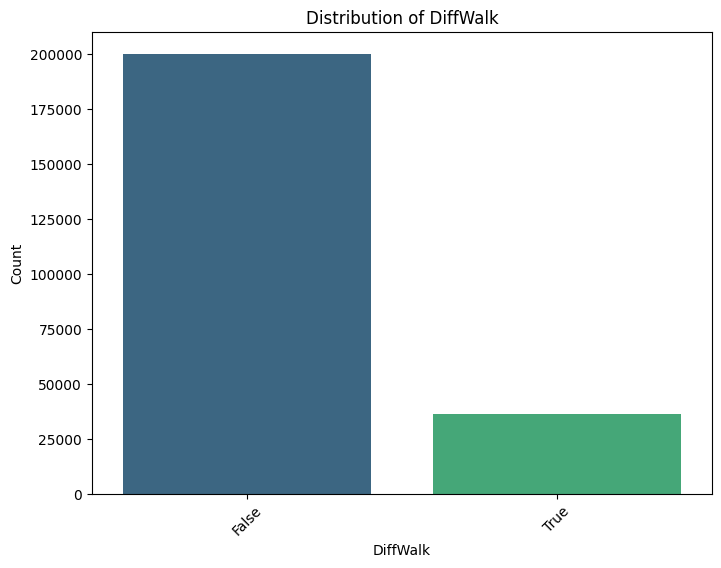

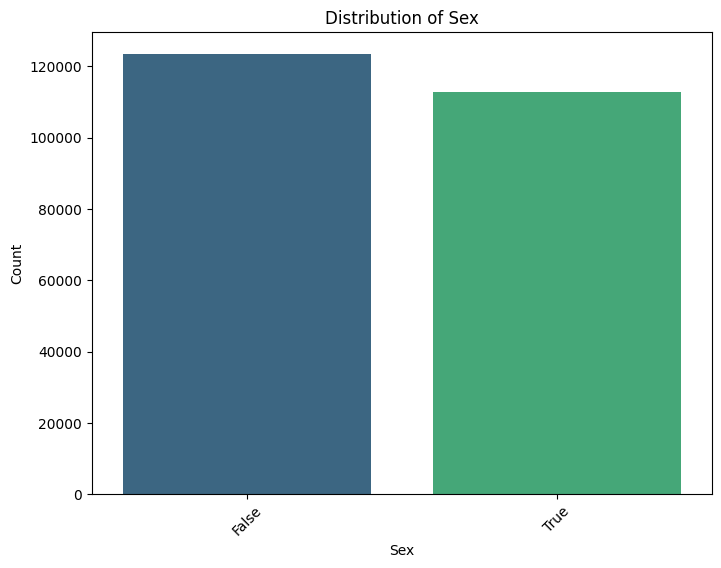

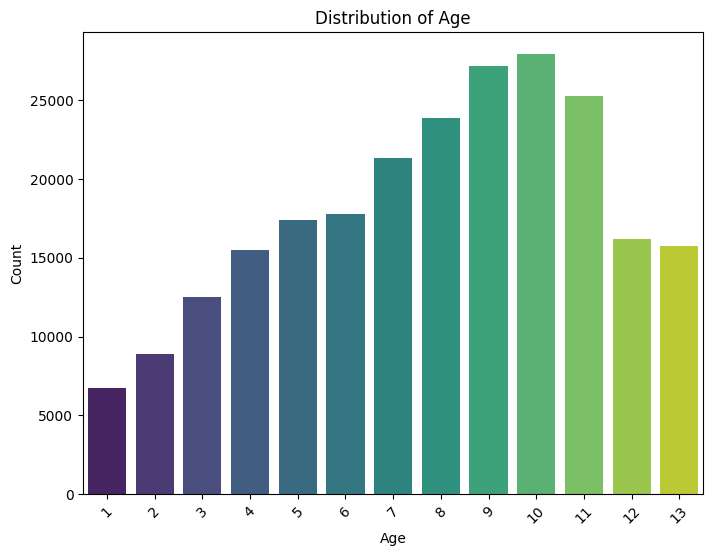

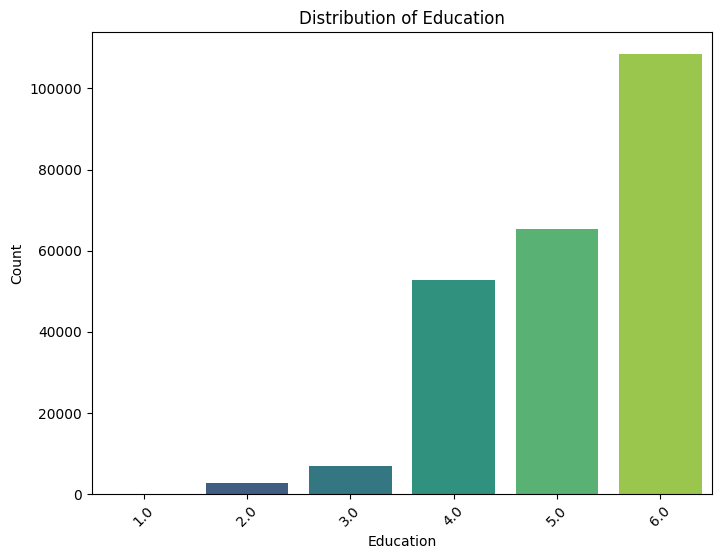

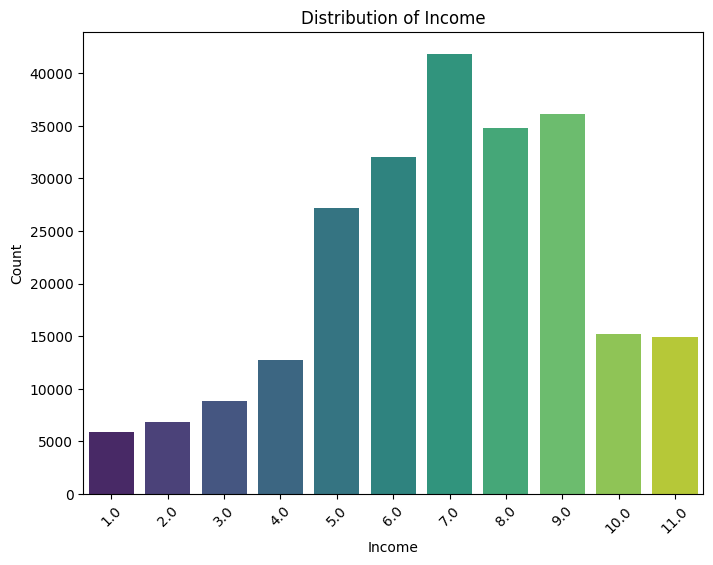

In [13]:

#data understanding (plotting distributions)
warnings.filterwarnings("ignore")
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column, palette='viridis')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


In [14]:
#creating a down-sampled dataframe

class_0 = df[df['Diabetes_012'] == 0.0]
class_1 = df[df['Diabetes_012'] == 1.0]
class_2 = df[df['Diabetes_012'] == 2.0]


n_samples = min(len(class_0), len(class_1), len(class_2))

class_0_downsampled = resample(class_0, replace=False, n_samples=n_samples, random_state=42)
class_1_downsampled = resample(class_1, replace=False, n_samples=n_samples, random_state=42)
class_2_downsampled = resample(class_2, replace=False, n_samples=n_samples, random_state=42)


df_downsampled = pd.concat([class_0_downsampled, class_1_downsampled, class_2_downsampled])


print(df_downsampled['Diabetes_012'].value_counts())


Diabetes_012
0.0    5619
1.0    5619
2.0    5619
Name: count, dtype: int64


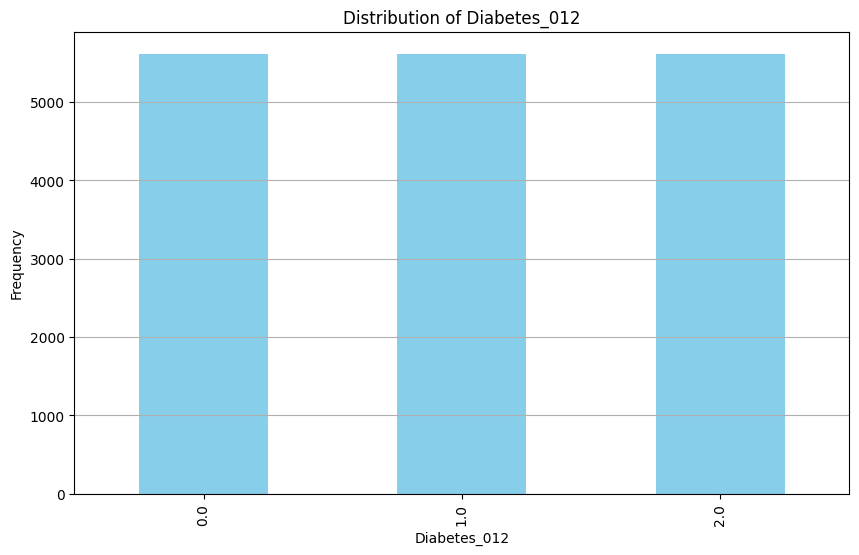

In [15]:
column_to_plot = 'Diabetes_012'


plt.figure(figsize=(10, 6))
df_downsampled[column_to_plot].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of ' + column_to_plot)
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


In [16]:

#creating an up sampled dataframe using SMOTE and generating synthetic records

X = df.drop(columns=['Diabetes_012'])  
y = df['Diabetes_012']


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Diabetes_012')], axis=1)


print(df_resampled['Diabetes_012'].value_counts())





Diabetes_012
0.0    197191
2.0    197191
1.0    197191
Name: count, dtype: int64


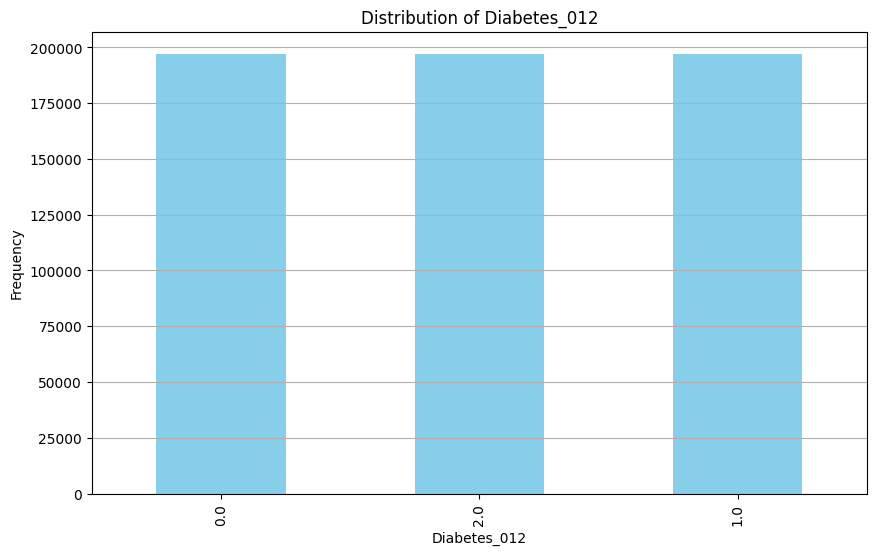

In [17]:
column_to_plot = 'Diabetes_012'

# Check distribution
plt.figure(figsize=(10, 6))
df_resampled[column_to_plot].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of ' + column_to_plot)
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

Original Df Modelling

In [18]:
#splitting the dataset
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Training Logistic Regression...
Best Parameters: {'C': 0.001}
Accuracy: 0.8382406859012325
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91     59214
         1.0       0.00      0.00      0.00      1647
         2.0       0.52      0.15      0.24     10053

    accuracy                           0.84     70914
   macro avg       0.46      0.38      0.38     70914
weighted avg       0.79      0.84      0.79     70914



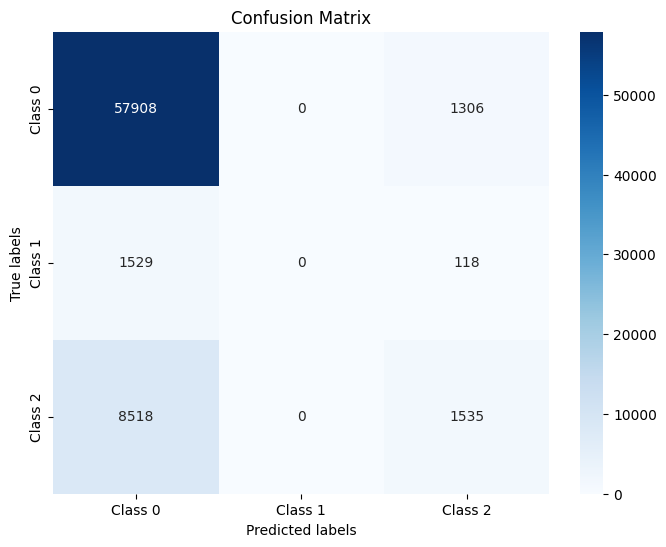


Training Decision Tree...
Best Parameters: {'min_samples_split': 2, 'max_depth': None}
Accuracy: 0.7516287333953803
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86     59214
         1.0       0.03      0.05      0.04      1647
         2.0       0.28      0.30      0.29     10053

    accuracy                           0.75     70914
   macro avg       0.39      0.40      0.40     70914
weighted avg       0.76      0.75      0.76     70914



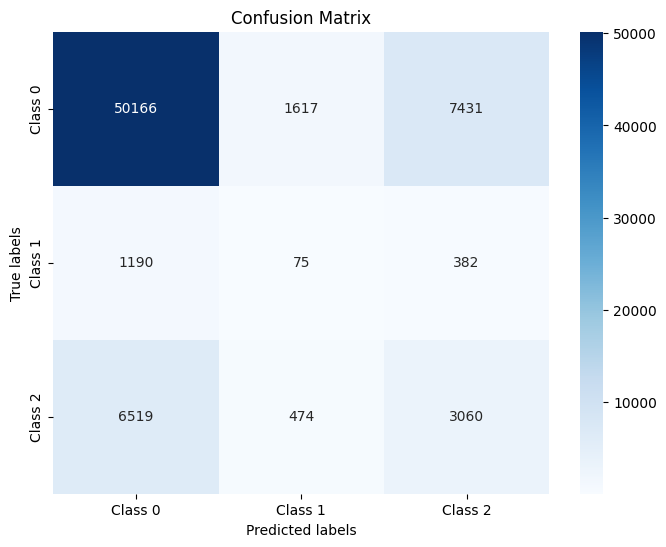


Training XGBoost...
Best Parameters: {'n_estimators': 50, 'max_depth': 3}
Accuracy: 0.8408212764757311
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91     59214
         1.0       0.00      0.00      0.00      1647
         2.0       0.55      0.17      0.26     10053

    accuracy                           0.84     70914
   macro avg       0.47      0.38      0.39     70914
weighted avg       0.79      0.84      0.80     70914



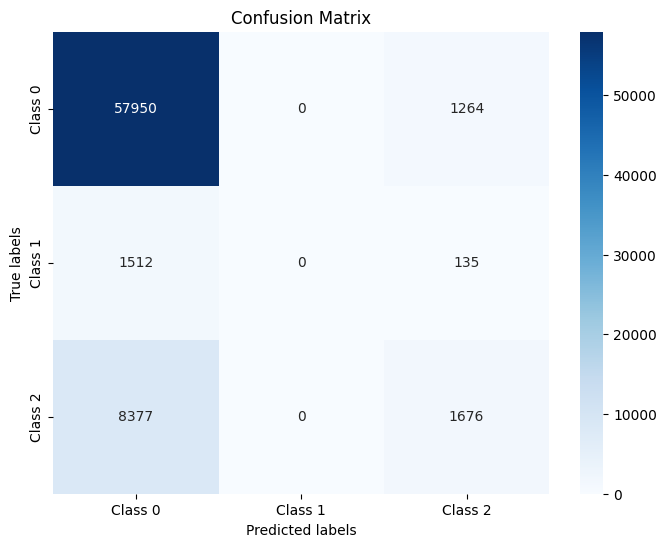


Training AdaBoost...
Best Parameters: {'n_estimators': 50, 'learning_rate': 0.01}
Accuracy: 0.8350114222861494
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91     59214
         1.0       0.00      0.00      0.00      1647
         2.0       0.00      0.00      0.00     10053

    accuracy                           0.84     70914
   macro avg       0.28      0.33      0.30     70914
weighted avg       0.70      0.84      0.76     70914



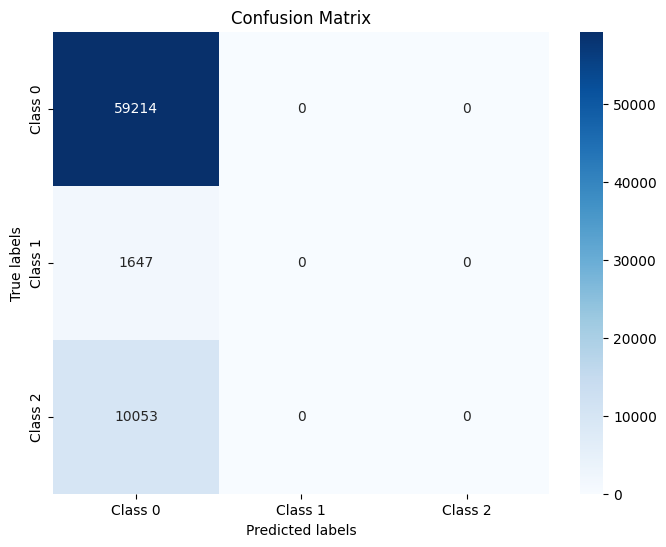


Training RandomForestClassifier...
Best Parameters: {'n_estimators': 100, 'max_depth': 30}
Accuracy: 0.8295400062046987
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.91     59214
         1.0       0.03      0.00      0.00      1647
         2.0       0.44      0.18      0.26     10053

    accuracy                           0.83     70914
   macro avg       0.44      0.38      0.39     70914
weighted avg       0.78      0.83      0.79     70914



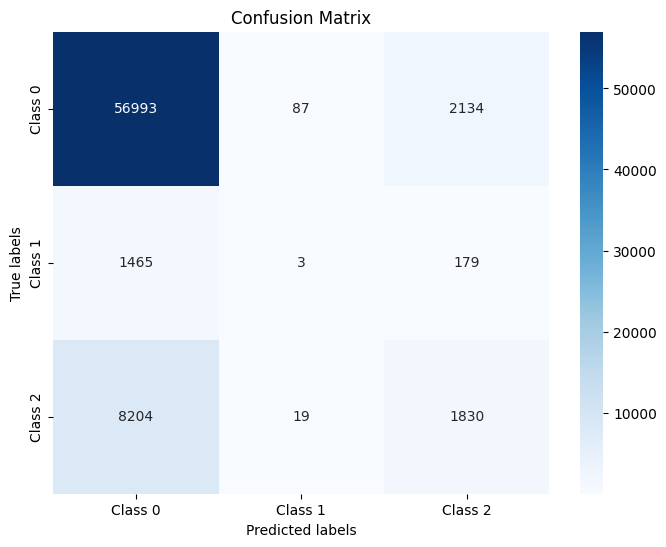

In [19]:

warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier



classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    #'SVC': SVC(random_state=42)
}

param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10]},
    'XGBoost': {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7]},
    'AdaBoost': {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1]},
    'RandomForestClassifier': {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30]},
    #'SVC': {'C': [ 1], 'kernel': ['rbf']}
}

def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

for name, classifier in classifiers.items():
    print(f"\nTraining {name}...")

    random_search = RandomizedSearchCV(classifier, param_grids[name], n_iter=10, cv=5, scoring='recall', random_state=42)
    random_search.fit(X_train, y_train)
    print("Best Parameters:", random_search.best_params_)

    best_classifier = random_search.best_estimator_
    best_classifier.fit(X_train, y_train)

    y_pred = best_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_rep)
    plot_confusion_matrix(cm, labels=['Class 0', 'Class 1', 'Class 2'])


Undersample df Modelling

In [20]:

# splitting the dataset
X = df_downsampled.drop('Diabetes_012', axis=1)
y = df_downsampled['Diabetes_012']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



Training Logistic Regression...
Best Parameters: {'C': 0.001}
Accuracy: 0.505338078291815
Classification Report:
              precision    recall  f1-score   support

         0.0       0.56      0.66      0.60      1697
         1.0       0.42      0.25      0.32      1720
         2.0       0.50      0.61      0.55      1641

    accuracy                           0.51      5058
   macro avg       0.49      0.51      0.49      5058
weighted avg       0.49      0.51      0.49      5058



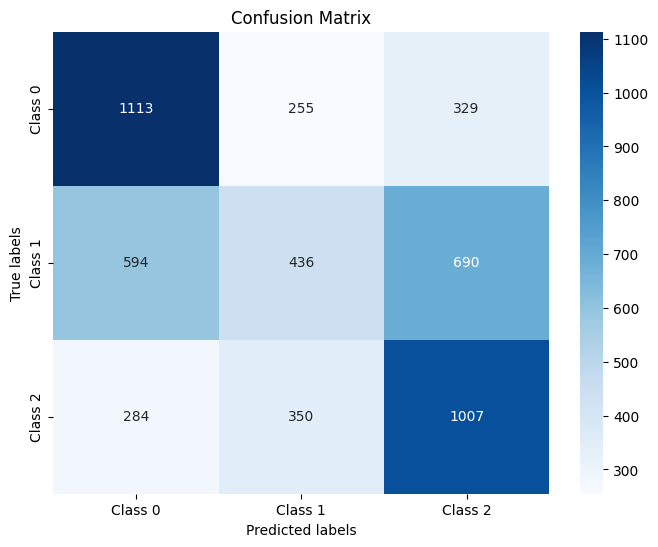


Training Decision Tree...
Best Parameters: {'min_samples_split': 2, 'max_depth': None}
Accuracy: 0.41182285488335313
Classification Report:
              precision    recall  f1-score   support

         0.0       0.48      0.47      0.47      1697
         1.0       0.36      0.35      0.36      1720
         2.0       0.40      0.41      0.41      1641

    accuracy                           0.41      5058
   macro avg       0.41      0.41      0.41      5058
weighted avg       0.41      0.41      0.41      5058



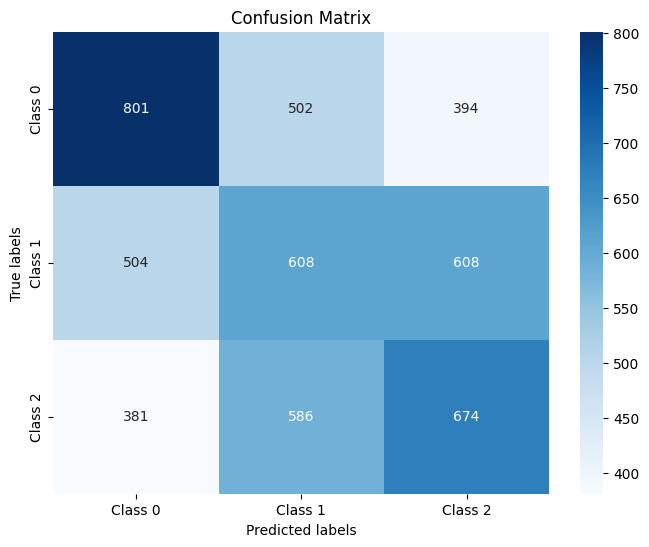


Training XGBoost...
Best Parameters: {'n_estimators': 50, 'max_depth': 3}
Accuracy: 0.5069197311190193
Classification Report:
              precision    recall  f1-score   support

         0.0       0.59      0.62      0.61      1697
         1.0       0.42      0.28      0.34      1720
         2.0       0.48      0.63      0.54      1641

    accuracy                           0.51      5058
   macro avg       0.50      0.51      0.50      5058
weighted avg       0.50      0.51      0.49      5058



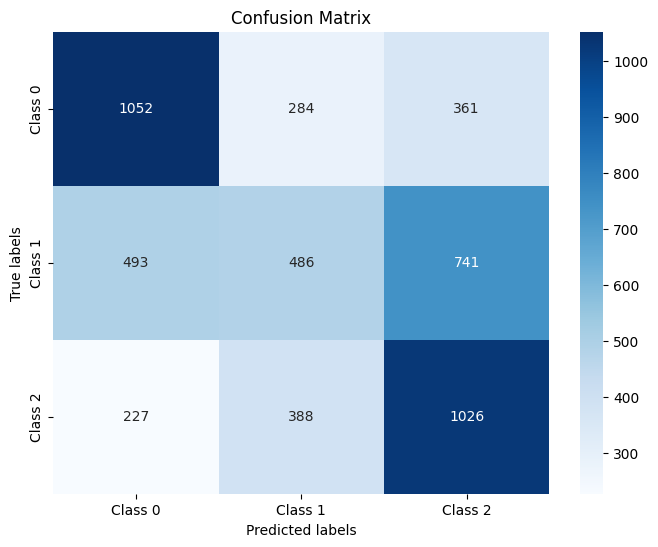


Training AdaBoost...
Best Parameters: {'n_estimators': 50, 'learning_rate': 0.01}
Accuracy: 0.4683669434559114
Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.60      0.54      1697
         1.0       0.38      0.23      0.28      1720
         2.0       0.48      0.59      0.53      1641

    accuracy                           0.47      5058
   macro avg       0.45      0.47      0.45      5058
weighted avg       0.45      0.47      0.45      5058



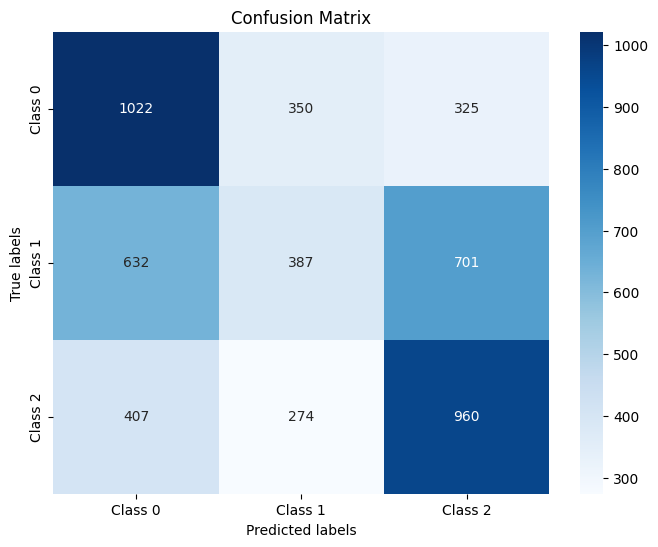


Training RandomForestClassifier...
Best Parameters: {'n_estimators': 100, 'max_depth': 30}
Accuracy: 0.48102016607354686
Classification Report:
              precision    recall  f1-score   support

         0.0       0.57      0.59      0.58      1697
         1.0       0.39      0.32      0.35      1720
         2.0       0.46      0.55      0.50      1641

    accuracy                           0.48      5058
   macro avg       0.48      0.48      0.48      5058
weighted avg       0.48      0.48      0.48      5058



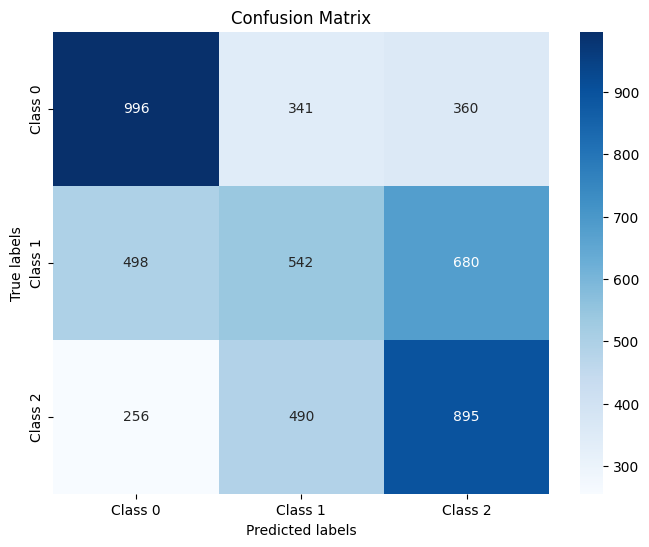

In [21]:

warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC



classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    #'SVC': SVC(random_state=42)
}

param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10]},
    'XGBoost': {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7]},
    'AdaBoost': {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1]},
    'RandomForestClassifier': {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30]},
    #'SVC': {'C': [1], 'kernel': ['rbf']}
}

def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

for name, classifier in classifiers.items():
    print(f"\nTraining {name}...")

    random_search = RandomizedSearchCV(classifier, param_grids[name], n_iter=10, cv=5, scoring='recall', random_state=42)
    random_search.fit(X_train, y_train)
    print("Best Parameters:", random_search.best_params_)

    best_classifier = random_search.best_estimator_
    best_classifier.fit(X_train, y_train)

    y_pred = best_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_rep)
    plot_confusion_matrix(cm, labels=['Class 0', 'Class 1', 'Class 2'])

OverSample Df Modelling

In [22]:
#splitting the dataset

X = df_resampled.drop('Diabetes_012', axis=1)
y = df_resampled['Diabetes_012']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Training Logistic Regression...
Best Parameters: {'C': 0.001}
Accuracy: 0.5659822394518572
Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.73      0.70     59079
         1.0       0.50      0.45      0.47     59280
         2.0       0.52      0.52      0.52     59113

    accuracy                           0.57    177472
   macro avg       0.56      0.57      0.56    177472
weighted avg       0.56      0.57      0.56    177472



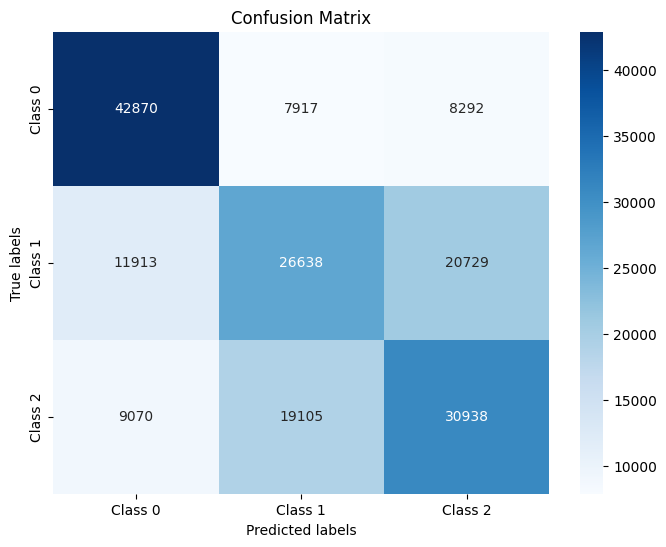

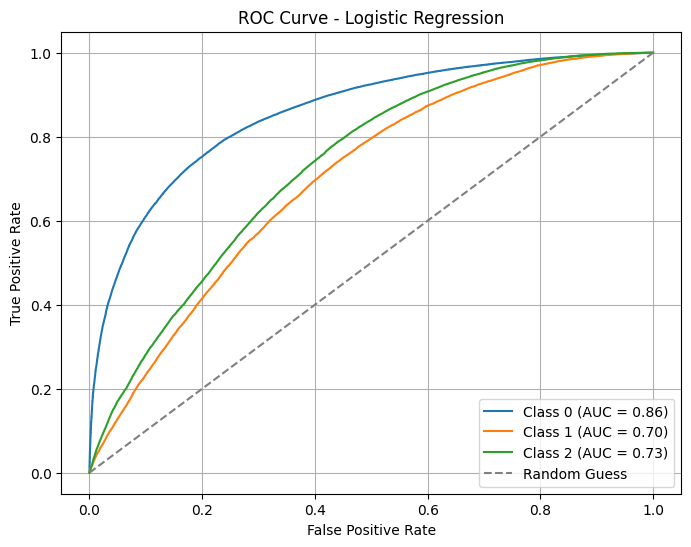

Logistic RegressionROC AUC Score: 0.7628147110774744

Training Decision Tree...
Best Parameters: {'min_samples_split': 2, 'max_depth': None}
Accuracy: 0.8397099260728453
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.79      0.81     59079
         1.0       0.89      0.93      0.91     59280
         2.0       0.79      0.81      0.80     59113

    accuracy                           0.84    177472
   macro avg       0.84      0.84      0.84    177472
weighted avg       0.84      0.84      0.84    177472



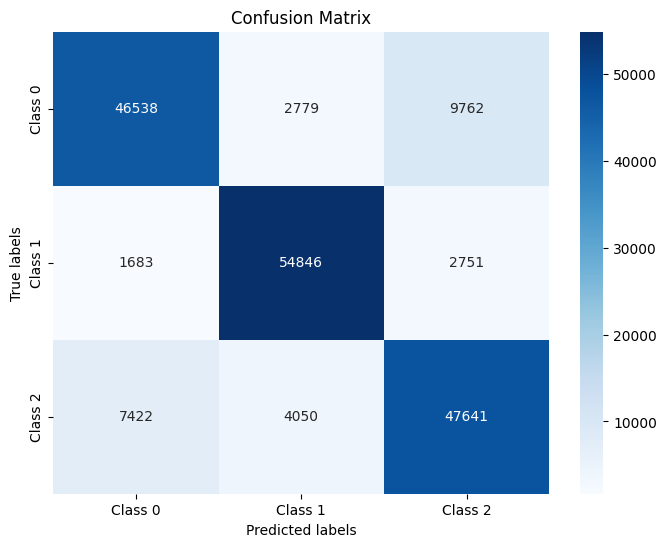

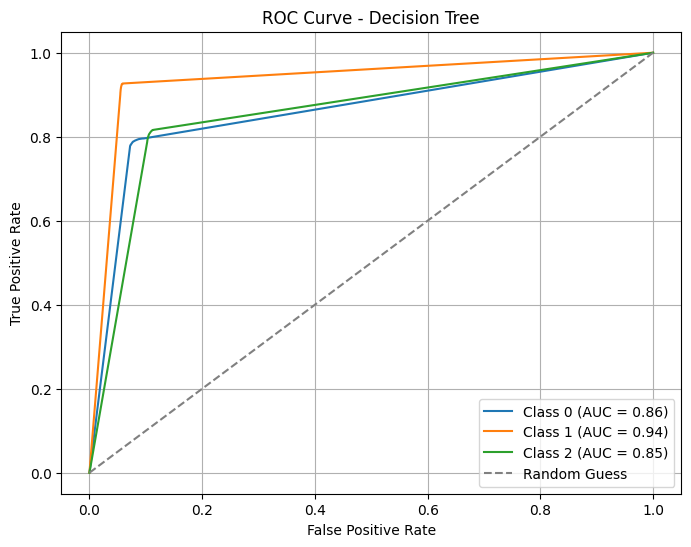

Decision TreeROC AUC Score: 0.8827036389975262

Training XGBoost...
Best Parameters: {'n_estimators': 50, 'max_depth': 3}
Accuracy: 0.6492235394879192
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.82      0.79     59079
         1.0       0.63      0.58      0.60     59280
         2.0       0.55      0.55      0.55     59113

    accuracy                           0.65    177472
   macro avg       0.65      0.65      0.65    177472
weighted avg       0.65      0.65      0.65    177472



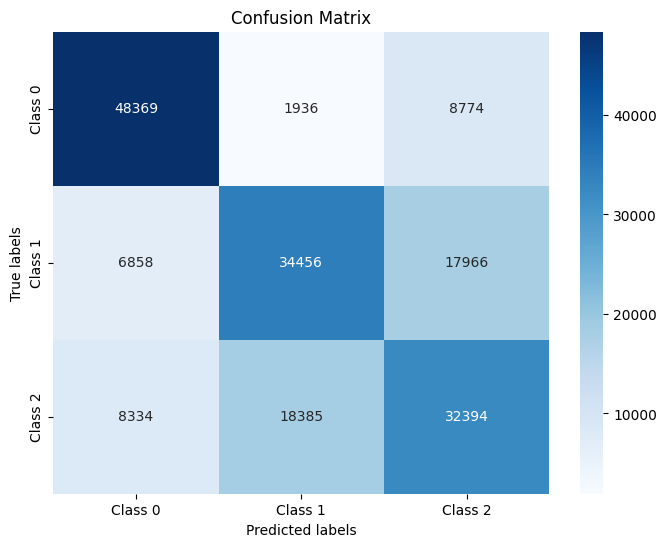

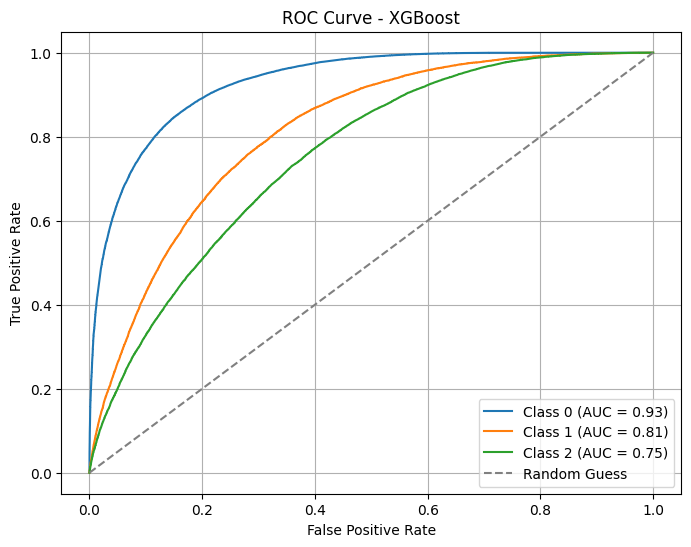

XGBoostROC AUC Score: 0.8325394674626994

Training AdaBoost...
Best Parameters: {'n_estimators': 50, 'learning_rate': 0.01}
Accuracy: 0.5058995221781464
Classification Report:
              precision    recall  f1-score   support

         0.0       0.62      0.64      0.63     59079
         1.0       0.36      0.16      0.22     59280
         2.0       0.48      0.72      0.57     59113

    accuracy                           0.51    177472
   macro avg       0.48      0.51      0.47    177472
weighted avg       0.48      0.51      0.47    177472



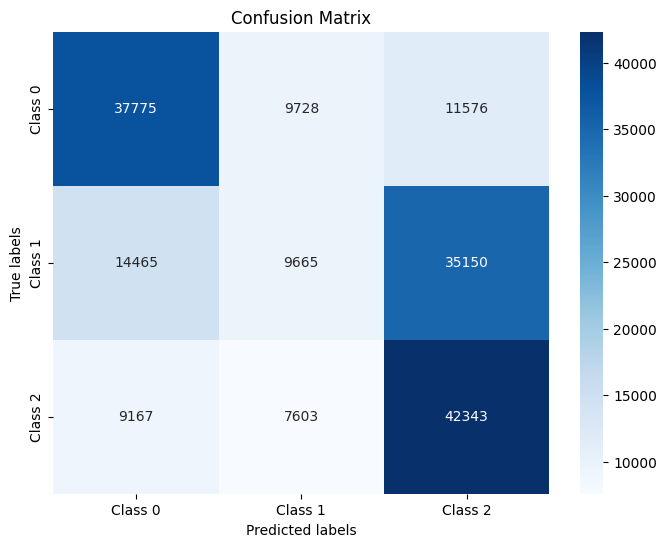

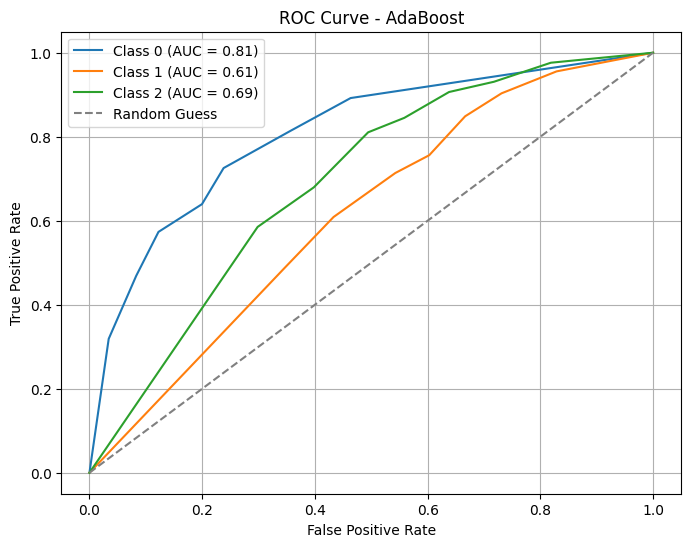

AdaBoostROC AUC Score: 0.7054258093683646

Training RandomForestClassifier...
Best Parameters: {'n_estimators': 100, 'max_depth': 30}
Accuracy: 0.9022606382978723
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87     59079
         1.0       0.96      0.97      0.96     59280
         2.0       0.86      0.88      0.87     59113

    accuracy                           0.90    177472
   macro avg       0.90      0.90      0.90    177472
weighted avg       0.90      0.90      0.90    177472



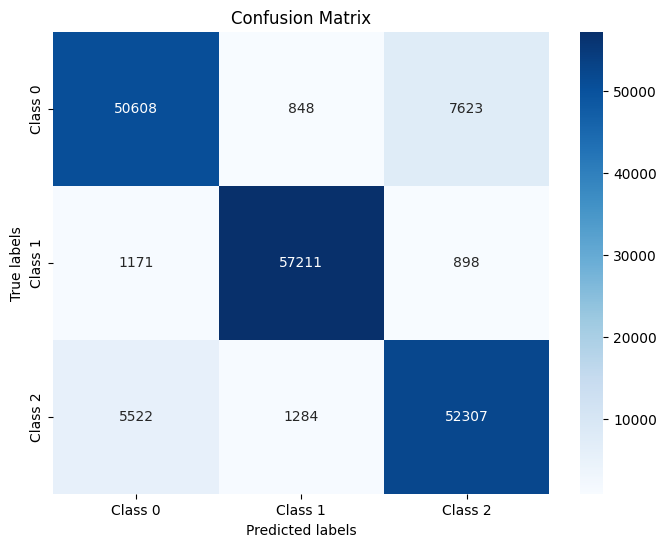

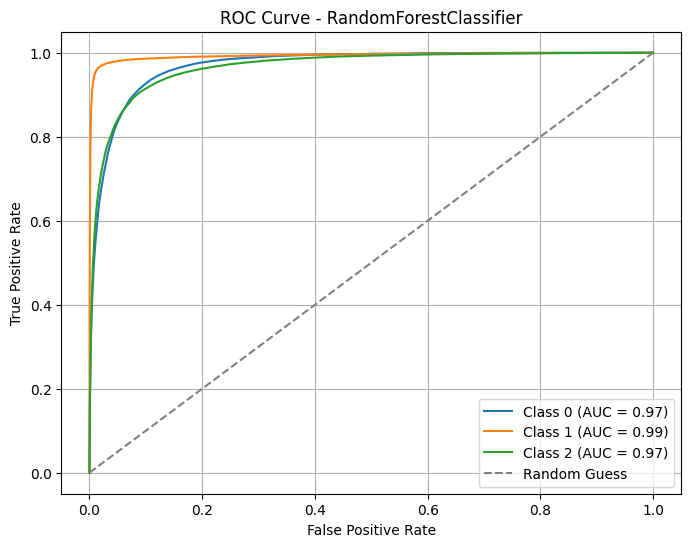

RandomForestClassifierROC AUC Score: 0.9765050898584778


In [23]:
#Modelling and plotting ROC Curve
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC



classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    #'SVC': SVC(random_state=42)
}

param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10]},
    'XGBoost': {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7]},
    'AdaBoost': {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1]},
    'RandomForestClassifier': {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30]},
    #'SVC': {'C': [1], 'kernel': ['rbf']}
}

def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

for name, classifier in classifiers.items():
    print(f"\nTraining {name}...")

    random_search = RandomizedSearchCV(classifier, param_grids[name], n_iter=10, cv=5, scoring='recall', random_state=42)
    random_search.fit(X_train, y_train)
    print("Best Parameters:", random_search.best_params_)

    best_classifier = random_search.best_estimator_
    best_classifier.fit(X_train, y_train)

    y_pred = best_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_rep)
    plot_confusion_matrix(cm, labels=['Class 0', 'Class 1', 'Class 2'])

    # Get predicted probabilities for each class
    y_pred_proba_rf = best_classifier.predict_proba(X_test)

    # Calculate the ROC curve and ROC AUC score for each class
    fpr_rf = dict()
    tpr_rf = dict()
    roc_auc_rf = dict()
    for i in range(len(best_classifier.classes_)):
        fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test == i, y_pred_proba_rf[:, i])
        roc_auc_rf[i] = roc_auc_score(y_test == i, y_pred_proba_rf[:, i])
    
    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))
    for i in range(len(best_classifier.classes_)):
        plt.plot(fpr_rf[i], tpr_rf[i], label=f'Class {i} (AUC = {roc_auc_rf[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - ' + name)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Overall ROC AUC score
    roc_auc_rf_ovr = roc_auc_score(y_test, y_pred_proba_rf, multi_class='ovr')
    print(name + "ROC AUC Score:", roc_auc_rf_ovr)



    

ANOVA

In [24]:
#ANOVA - checks hypothesis and commparison on all models


logistic_regression_recall = [0.73, 0.45, 0.52]  
decision_tree_recall = [0.79, 0.93, 0.81]  
xgboost_recall = [0.82, 0.58, 0.55]
adaboost_recall = [0.64, 0.16, 0.72]
random_forest_recall = [0.86, 0.97, 0.88]


t_statistic, p_value = f_oneway(logistic_regression_recall, decision_tree_recall, xgboost_recall, adaboost_recall, random_forest_recall)
print(p_value)

alpha = 0.1
if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant difference in the recall performance between All the models.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in the recall performance between All the models.")


0.06640696160256375
Reject Null Hypothesis: There is a significant difference in the recall performance between All the models.


Ttest

In [25]:
#Ttest - pairwise comparison for different models


model_pairs = [('Logistic_Regression', 'Decision_Tree'),
               ('Logistic_Regression', 'XGBoost'),
               ('Logistic_Regression', 'AdaBoost'),
               ('Logistic_Regression', 'Random_Forest'),
               ('Decision_Tree', 'XGBoost'),
               ('Decision_Tree', 'AdaBoost'),
               ('Decision_Tree', 'Random_Forest'),
               ('XGBoost', 'AdaBoost'),
               ('XGBoost', 'Random_Forest'),
               ('AdaBoost', 'Random_Forest')]


for model1, model2 in model_pairs:
    print(f"Comparing {model1} and {model2}:")
    t_statistic, p_value = ttest_rel(eval(model1.lower().replace(' ', '_') + '_recall'), eval(model2.lower().replace(' ', '_') + '_recall'))
    print(f"P-value: {p_value:.6f}")
    alpha = 0.1
    if p_value < alpha:
        print("Reject Null Hypothesis as There is a significant difference in Recall performance.")
    else:
        print("Fail to Reject Null Hypothesis as There is no significant difference in Recall performance.")
    print()


Comparing Logistic_Regression and Decision_Tree:
P-value: 0.150359
Fail to Reject Null Hypothesis as There is no significant difference in Recall performance.

Comparing Logistic_Regression and XGBoost:
P-value: 0.103130
Fail to Reject Null Hypothesis as There is no significant difference in Recall performance.

Comparing Logistic_Regression and AdaBoost:
P-value: 0.714178
Fail to Reject Null Hypothesis as There is no significant difference in Recall performance.

Comparing Logistic_Regression and Random_Forest:
P-value: 0.096881
Reject Null Hypothesis as There is a significant difference in Recall performance.

Comparing Decision_Tree and XGBoost:
P-value: 0.233785
Fail to Reject Null Hypothesis as There is no significant difference in Recall performance.

Comparing Decision_Tree and AdaBoost:
P-value: 0.261514
Fail to Reject Null Hypothesis as There is no significant difference in Recall performance.

Comparing Decision_Tree and Random_Forest:
P-value: 0.026671
Reject Null Hypothesis